In [ ]:
### Objectives
# The goal of this project is to understand video game sales trends and predict future sales. We will explore the sales data across different platforms, publishers, and time periods to gain insights into the video game industry.

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

warnings.filterwarnings('ignore')

In [29]:
# URL of the Wikipedia page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_video_games'
# Here is alll the link I've web Scrapped :
"""
https://en.wikipedia.org/wiki/List_of_best-selling_GameCube_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_Wii_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_Wii_U_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_Nintendo_Switch_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_PC_games
https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_360_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_One_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_PlayStation_2_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_PlayStation_3_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_PlayStation_4_video_games
https://en.wikipedia.org/wiki/List_of_best-selling_PlayStation_5_video_games
"""
# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the first table on the page (assuming the list is in the first table)
    table = soup.find('table', {'class': 'wikitable'})
    
    # Convert the HTML table to a pandas dataframe
    df_Games = pd.read_html(str(table))[0]
    
    # Display the dataframe
    print(df_Games)
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

                                          Title      Sales  \
0                                     Minecraft  300000000   
1                            Grand Theft Auto V  200000000   
2                                   Tetris (EA)  100000000   
3                                    Wii Sports   82900000   
4                           PUBG: Battlegrounds   75000000   
5                         Mario Kart 8 / Deluxe   70430000   
6                         Red Dead Redemption 2   63000000   
7                             Super Mario Bros.   58000000   
8                                     Overwatch   50000000   
9                              Human: Fall Flat   50000000   
10                     The Witcher 3: Wild Hunt   50000000   
11                      Tetris (Game Boy / NES)   48000000   
12          Pokémon Red / Green / Blue / Yellow   47520000   
13                Animal Crossing: New Horizons   45360000   
14                                     Terraria   44500000   
15      

In [30]:

# Define the input and output directories
input_dir = r'C:\Users\kn010\OneDrive\Documents\Concordia files\Final Project EDA\data'
output_dir = r'C:\Users\kn010\OneDrive\Documents\Concordia files\Final Project EDA\data\Cleaned'

# Define the mapping of filenames to console names
files = {
    "best_selling_video_games_PS2.csvs_sorted.csv": "PlayStation 2",
    "best_selling_video_games_PS3.csvs_sorted.csv": "PlayStation 3",
    "best_selling_video_games_PS4.csvs_sorted.csv": "PlayStation 4",
    "best_selling_video_games_PS5.csvs_sorted.csv": "PlayStation 5",
    "GameCube_best_selling_games.csv": "GameCube",
    "PC_best_selling_games.csv": "PC",
    "Nintendo Switch_best_selling_games.csv": "Nintendo Switch",
    "Wii_best_selling_games.csv": "Wii",
    "Wii U_best_selling_games.csv": "Wii U",
    "Xbox_best_selling_games.csv": "Xbox",
    "Xbox One_best_selling_games.csv": "Xbox One",
    "Xbox 360_best_selling_games.csv": "Xbox 360"
}

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to clean up the 'Total Game copies sold' column
def clean_copies_sold(value):
    # Remove text within square brackets
    cleaned_value = re.sub(r'\[.*?\]', '', value)
    return cleaned_value.strip()

# Function to clean the dataframe
def clean_dataframe(df, console_name):
    # Print the columns before renaming
    print(f"Before renaming: {df.columns.tolist()}")
    
    # Renaming columns
    df.rename(columns=lambda x: x.replace('[a]', '').replace('(s)', '').replace('total copies sold', 'Copies sold').replace('Total Game copies sold', 'Copies sold'), inplace=True)
    
    # Print the columns after renaming
    print(f"After renaming: {df.columns.tolist()}")
    
    # Check if 'Copies sold' column exists
    if 'Copies sold' in df.columns:
        # Cleaning the 'Copies sold' column
        df['Copies sold'] = df['Copies sold'].apply(clean_copies_sold)
    else:
        print("Warning: 'Copies sold' column not found.")
    
    # Remove any existing 'console_name' columns
    if 'console_name' in df.columns:
        df.drop(columns=['console_name'], inplace=True)
    
    # Add the 'Console_name' column
    df['Console_name'] = console_name
    
    return df

# Process each file
for file_name, console_name in files.items():
    input_file_path = os.path.join(input_dir, file_name)
    output_file_path = os.path.join(output_dir, file_name)
    
    # Load the CSV file
    df = pd.read_csv(input_file_path)
    
    # Clean the dataframe
    df = clean_dataframe(df, console_name)
    
    # Save the cleaned dataframe to a new CSV file
    df.to_csv(output_file_path, index=False)

    # Print the first few rows of the cleaned dataframe
    print(f"Cleaned data for {console_name}:")
    print(df.head())

Before renaming: ['Game', 'Copies sold', 'Release date', 'Genre', 'Developer', 'Publisher', 'Console_name']
After renaming: ['Game', 'Copies sold', 'Release date', 'Genre', 'Developer', 'Publisher', 'Console_name']
Cleaned data for PlayStation 2:
                           Game          Copies sold Release date  \
0         Tekken Tag Tournament        2.467 million   2000-03-30   
1               Madden NFL 2001        1.236 million   2000-10-26   
2  Midnight Club: Street Racing        1.976 million   2000-10-26   
3                    Dark Cloud  1.2 million shipped   2000-12-14   
4            Onimusha: Warlords         2.02 million   2001-01-25   

                            Genre      Developer  \
0                        Fighting          Namco   
1                          Sports     EA Tiburon   
2                          Racing  Angel Studios   
3             Action role-playing        Level-5   
4  Action-adventurehack and slash         Capcom   

                         

In [69]:

# Define the path to the uploaded data files
data_path = r'C:\Users\kn010\OneDrive\Documents\Concordia files\Final Project EDA\data\Cleaned'

# List of files and their respective platform names with the updated names
files = {
    "best_selling_video_games_Playstation2.csv": "PlayStation 2",
    "best_selling_video_games_Playstation3.csv": "PlayStation 3",
    "best_selling_video_games_Playstation4.csv": "PlayStation 4",
    "best_selling_video_games_Playstation5.csv": "PlayStation 5",
    "best_selling_games_GameCube.csv": "GameCube",
    "best_selling_games_Nintendo_Switch.csv": "Nintendo Switch",
    "best_selling_games_PC.csv": "PC",
    "best_selling_games_Wii.csv": "Wii",
    "best_selling_games_Wii_U.csv": "Wii U",
    "best_selling_games_Xbox.csv": "Xbox",
    "best_selling_games_Xbox_One.csv": "Xbox One",
    "best_selling_games_Xbox 360.csv": "Xbox 360"
}

# Function to clean numeric data
def clean_numeric_data(value):
    value = str(value).replace(',', '')
    value = re.sub(r'[^\d.]', '', value)  # Remove any non-numeric characters except decimal point
    try:
        return float(value)
    except ValueError:
        return np.nan

# Load the data into a dictionary of DataFrames and add the Platform column
dataframes = {}
for file_name, platform_name in files.items():
    file_path = os.path.join(data_path, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    df = pd.read_csv(file_path)
    df.columns = [col.strip() for col in df.columns]  # Remove any leading/trailing whitespace
    df = df.rename(columns={
        'Copies sold': 'Total Game copies sold',
        'Release date': 'Release date',
        'Developer': 'Developer',
        'Publisher': 'Publisher',
        'Genre': 'Genre'
    })
    df = df.drop_duplicates()
    df = df.dropna(subset=['Total Game copies sold'])  # Drop rows where 'Total Game copies sold' is missing
    df['Total Game copies sold'] = df['Total Game copies sold'].apply(clean_numeric_data)
    df = df.dropna(subset=['Total Game copies sold'])  # Drop rows where 'Total Game copies sold' could not be converted
    df['Platform'] = platform_name  # Add the platform column
    df = df.drop(columns=['Console_name'], errors='ignore')  # Remove the 'Console_name' column
    dataframes[platform_name] = df
    # Debug: Print the first few rows of each platform data to ensure it is loaded correctly
    print(f"First few rows of {platform_name} data:")
    print(dataframes[platform_name].head())

# Concatenate all dataframes into one for overall analysis
if dataframes:
    all_data = pd.concat(dataframes.values(), ignore_index=True)
else:
    print("No data loaded. Please check the file paths and ensure they are correct.")
    exit()

# Ensure all column names are stripped of whitespace
all_data.columns = [col.strip() for col in all_data.columns]

# Remove the unintended 'Platform' column if it exists
if 'Platform(s)' in all_data.columns:
    all_data = all_data.drop(columns=['Platform(s)'])

# Verify the column names and data types
print("Column names and data types before renaming:")
print(all_data.dtypes)

# Clean the 'Total Game copies sold' column
all_data['Total Game copies sold'] = all_data['Total Game copies sold'].apply(clean_numeric_data)

# Filter out unrealistic values ( greater than 100 million copies sold)
all_data = all_data[all_data['Total Game copies sold'] <= 100000000]

# Verify if the 'Total Game copies sold' column is numeric
print("Data types after cleaning 'Total Game copies sold':")
print(all_data['Total Game copies sold'].dtype)

# Drop rows with non-numeric 'Total Game copies sold'
all_data = all_data.dropna(subset=['Total Game copies sold'])

# Convert 'Release date' to datetime
all_data['Release date'] = pd.to_datetime(all_data['Release date'], errors='coerce')

# Drop rows with missing 'Release date'
all_data = all_data.dropna(subset=['Release date'])

# Add a 'Year' column
all_data['Year'] = all_data['Release date'].dt.year

# Verify the Year and Total Game copies sold columns
print("Summary of 'Year' column:")
print(all_data['Year'].describe())
print("Summary of 'Total Game copies sold' column:")
print(all_data['Total Game copies sold'].describe())

# Ensure 'Year' is numeric
all_data = all_data.dropna(subset=['Year'])

print("Data cleaning complete.")

# Verify the data structure
print("First few rows of all_data:")
print(all_data.head())

# Check for unique platform values in the DataFrame
unique_platforms = all_data['Platform'].unique()
print("Unique platforms in the data:", unique_platforms)

# Generate the bar plot to compare sales across different platforms
sales_per_platform = all_data.groupby('Platform')['Total Game copies sold'].sum().reset_index()


First few rows of PlayStation 2 data:
                           Game  Total Game copies sold Release date  \
0         Tekken Tag Tournament                   2.467   2000-03-30   
1               Madden NFL 2001                   1.236   2000-10-26   
2  Midnight Club: Street Racing                   1.976   2000-10-26   
3                    Dark Cloud                   1.200   2000-12-14   
4            Onimusha: Warlords                   2.020   2001-01-25   

                            Genre      Developer  \
0                        Fighting          Namco   
1                          Sports     EA Tiburon   
2                          Racing  Angel Studios   
3             Action role-playing        Level-5   
4  Action-adventurehack and slash         Capcom   

                                    Publisher       Platform  
0    WW: NamcoEU: Sony Computer Entertainment  PlayStation 2  
1  NA/EU: EA SportsJP: Electronic Arts Square  PlayStation 2  
2                          

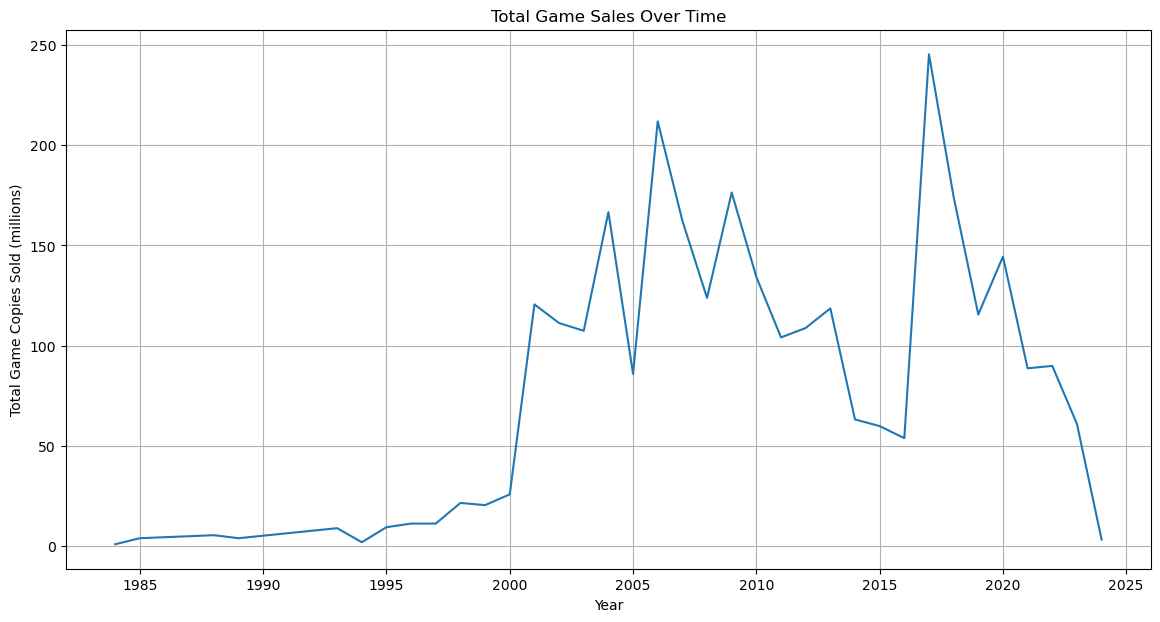

In [33]:
### Track Sales Performance Over Time

# Group by year and sum the total game copies sold
sales_per_year = all_data.groupby('Year')['Total Game copies sold'].sum().reset_index()

# Plot sales performance over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_per_year, x='Year', y='Total Game copies sold')
plt.title('Total Game Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Game Copies Sold (millions)')
plt.grid(True)
plt.show()

In [34]:
### Data Exploration:

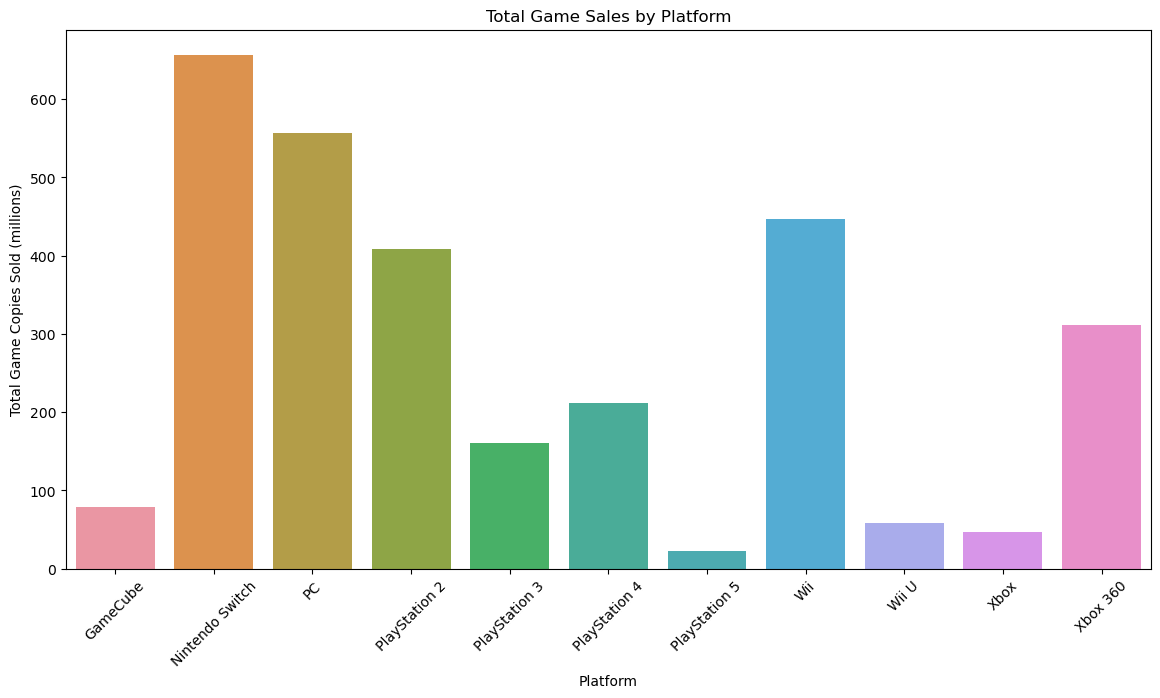

In [35]:
### Compare Sales Across Categories and Regions
# Comparing sales across different platforms
sales_per_platform = all_data.groupby('Platform')['Total Game copies sold'].sum().reset_index()

# Bar Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_per_platform, x='Platform', y='Total Game copies sold')
plt.title('Total Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Game Copies Sold (millions)')
plt.xticks(rotation=45)
plt.show()

                        Publisher  Total Sales  Average Sales  Number of Games
0                        Nintendo      981.830       7.272815              135
1     Sony Computer Entertainment      172.094       3.661574               47
2                      Activision      130.790       3.633056               36
3  Sony Interactive Entertainment      122.710       9.439231               13
4                  Rockstar Games      106.751       6.671938               16
5          Microsoft Game Studios      102.872       4.472696               23
6     The Pokémon CompanyNintendo       96.150      19.230000                5
7                 Electronic Arts       76.404       2.728714               28
8          Blizzard Entertainment       59.000       7.375000                8
9                       EA Sports       54.279       1.871690               29


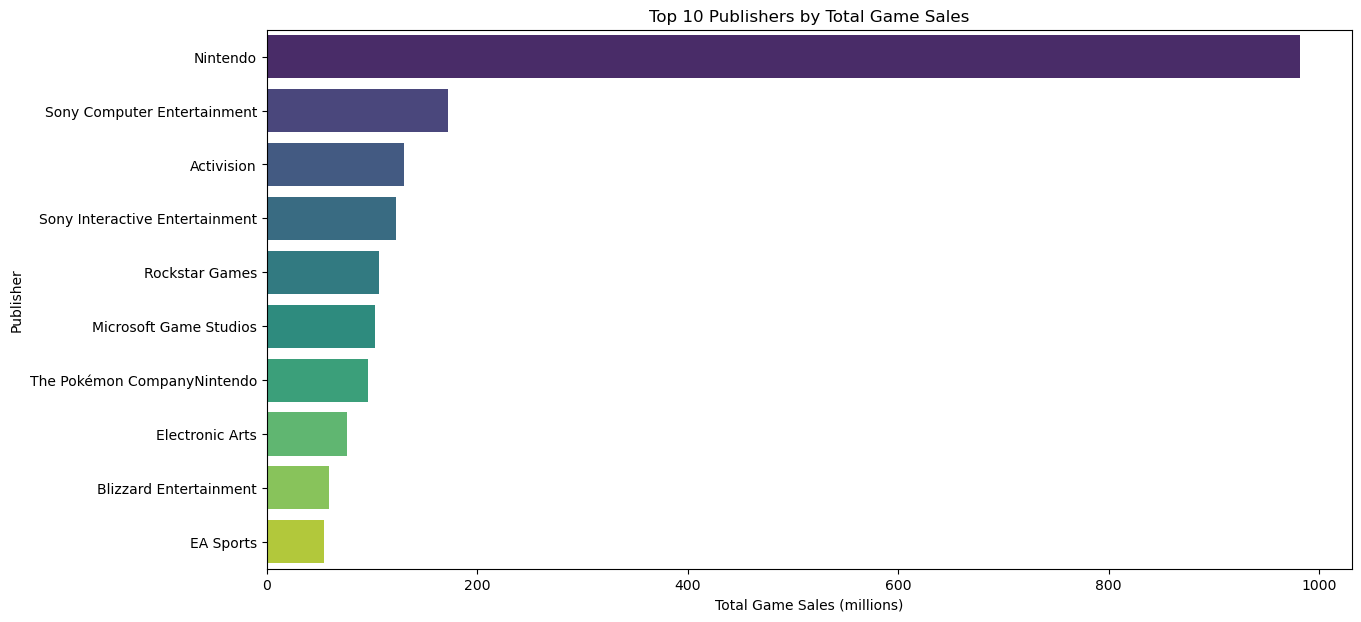

Top 10 Publishers by Total Game Sales:
                        Publisher  Total Sales  Average Sales  Number of Games
0                        Nintendo      981.830       7.272815              135
1     Sony Computer Entertainment      172.094       3.661574               47
2                      Activision      130.790       3.633056               36
3  Sony Interactive Entertainment      122.710       9.439231               13
4                  Rockstar Games      106.751       6.671938               16
5          Microsoft Game Studios      102.872       4.472696               23
6     The Pokémon CompanyNintendo       96.150      19.230000                5
7                 Electronic Arts       76.404       2.728714               28
8          Blizzard Entertainment       59.000       7.375000                8
9                       EA Sports       54.279       1.871690               29


In [70]:

# Aggregate total and average sales per publisher
publisher_stats = all_data.groupby('Publisher')['Total Game copies sold'].agg(['sum', 'mean', 'count'])
publisher_stats.columns = ['Total Sales', 'Average Sales', 'Number of Games']
publisher_stats = publisher_stats.sort_values(by='Total Sales', ascending=False).reset_index()

# Display top 10 publishers
top_10_publishers = publisher_stats.head(10)
print(top_10_publishers)

# Bar plot of total game sales by publisher
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Sales', y='Publisher', data=top_10_publishers, palette='viridis')
plt.title('Top 10 Publishers by Total Game Sales')
plt.xlabel('Total Game Sales (millions)')
plt.ylabel('Publisher')
plt.show()

# Displaying the table
print("Top 10 Publishers by Total Game Sales:")
print(top_10_publishers[['Publisher', 'Total Sales', 'Average Sales', 'Number of Games']])

                        Publisher  Total Sales  Average Sales  Number of Games
0                        Nintendo      981.830       7.272815              135
1     Sony Computer Entertainment      172.094       3.661574               47
2                      Activision      130.790       3.633056               36
3  Sony Interactive Entertainment      122.710       9.439231               13
4                  Rockstar Games      106.751       6.671938               16
5          Microsoft Game Studios      102.872       4.472696               23
6     The Pokémon CompanyNintendo       96.150      19.230000                5
7                 Electronic Arts       76.404       2.728714               28
8          Blizzard Entertainment       59.000       7.375000                8
9                       EA Sports       54.279       1.871690               29


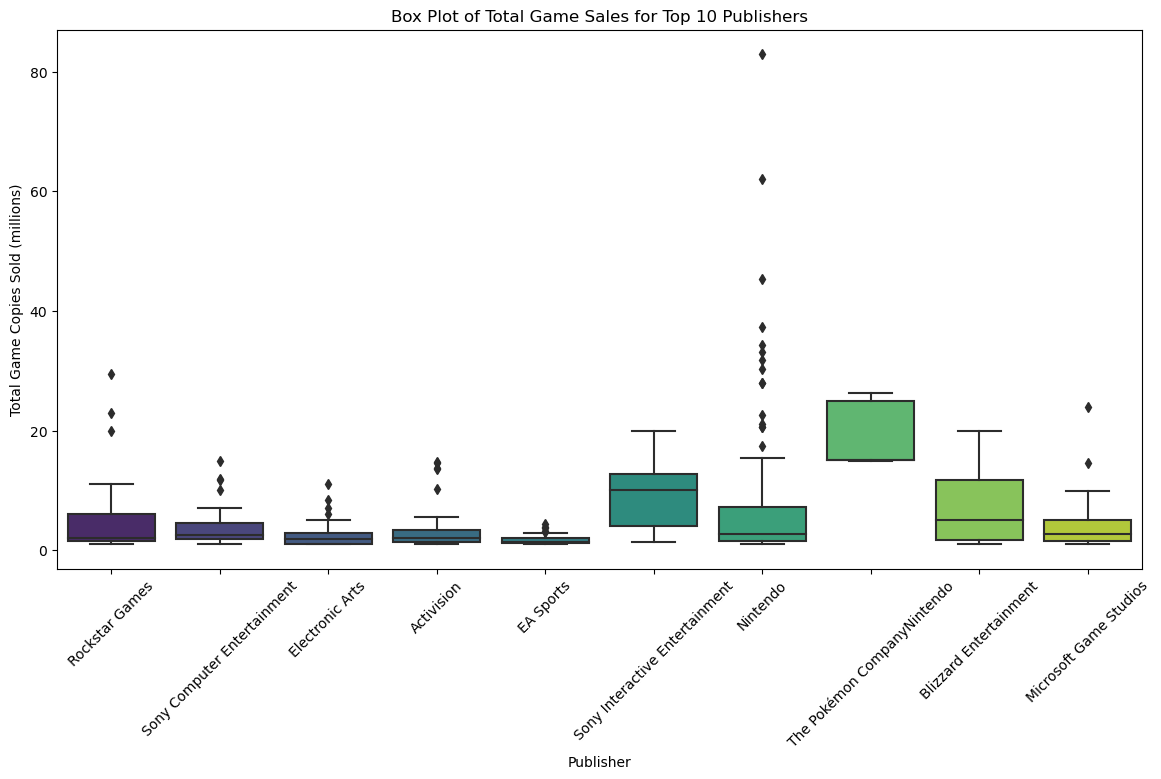

In [71]:

# Aggregate total and average sales per publisher
publisher_stats = all_data.groupby('Publisher')['Total Game copies sold'].agg(['sum', 'mean', 'count'])
publisher_stats.columns = ['Total Sales', 'Average Sales', 'Number of Games']
publisher_stats = publisher_stats.sort_values(by='Total Sales', ascending=False).reset_index()

# Display top 10 publishers
top_10_publishers = publisher_stats.head(10)
print(top_10_publishers)

# Filter data for only the top 10 publishers
top_publishers_data = all_data[all_data['Publisher'].isin(top_10_publishers['Publisher'])]

# Box plot of total game sales for top publishers
plt.figure(figsize=(14, 7))
sns.boxplot(data=top_publishers_data, x='Publisher', y='Total Game copies sold', palette='viridis')
plt.title('Box Plot of Total Game Sales for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Total Game Copies Sold (millions)')
plt.xticks(rotation=45)
plt.show()

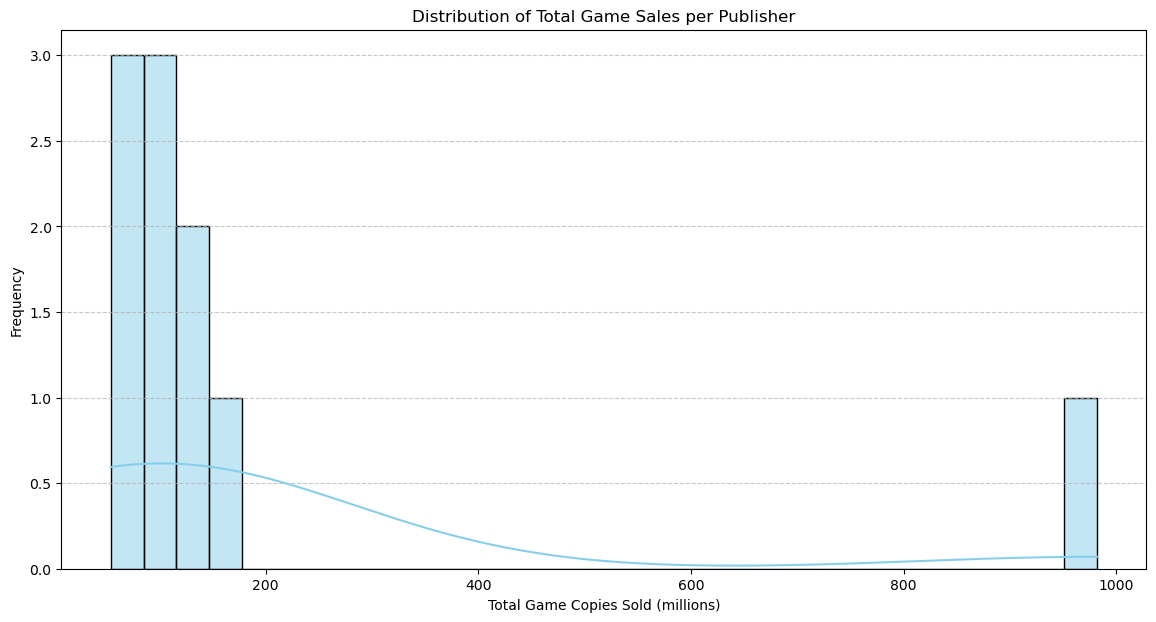

In [60]:

# Aggregate total sales per publisher
publisher_sales = all_data.groupby('Publisher')['Total Game copies sold'].sum().reset_index()

# Filter data for only the top 10 publishers
top_publishers_sales = publisher_sales[publisher_sales['Publisher'].isin(top_10_publishers['Publisher'])]

# Plotting
plt.figure(figsize=(14, 7))
sns.histplot(top_publishers_sales['Total Game copies sold'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Game Sales per Publisher')
plt.xlabel('Total Game Copies Sold (millions)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

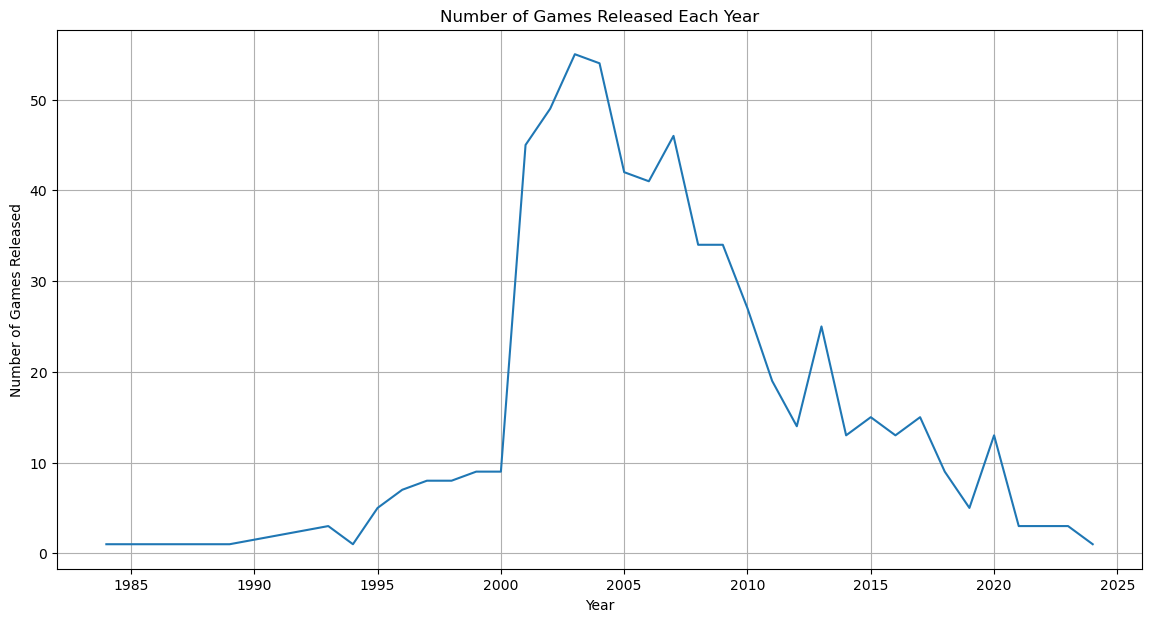

In [61]:
# Extract year from release date
all_data['Year'] = pd.to_datetime(all_data['Release date']).dt.year

# Count number of games released each year
yearly_releases = all_data.groupby('Year')['Game'].count().reset_index()

# Line Plot of Yearly Releases
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_releases, x='Year', y='Game')
plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.show()

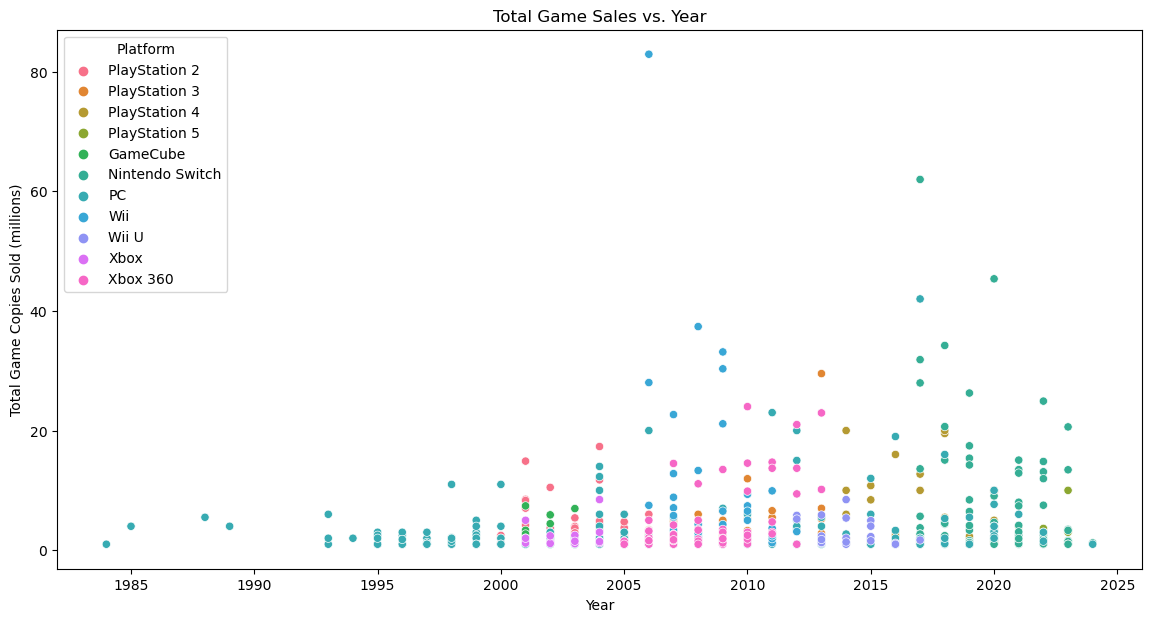

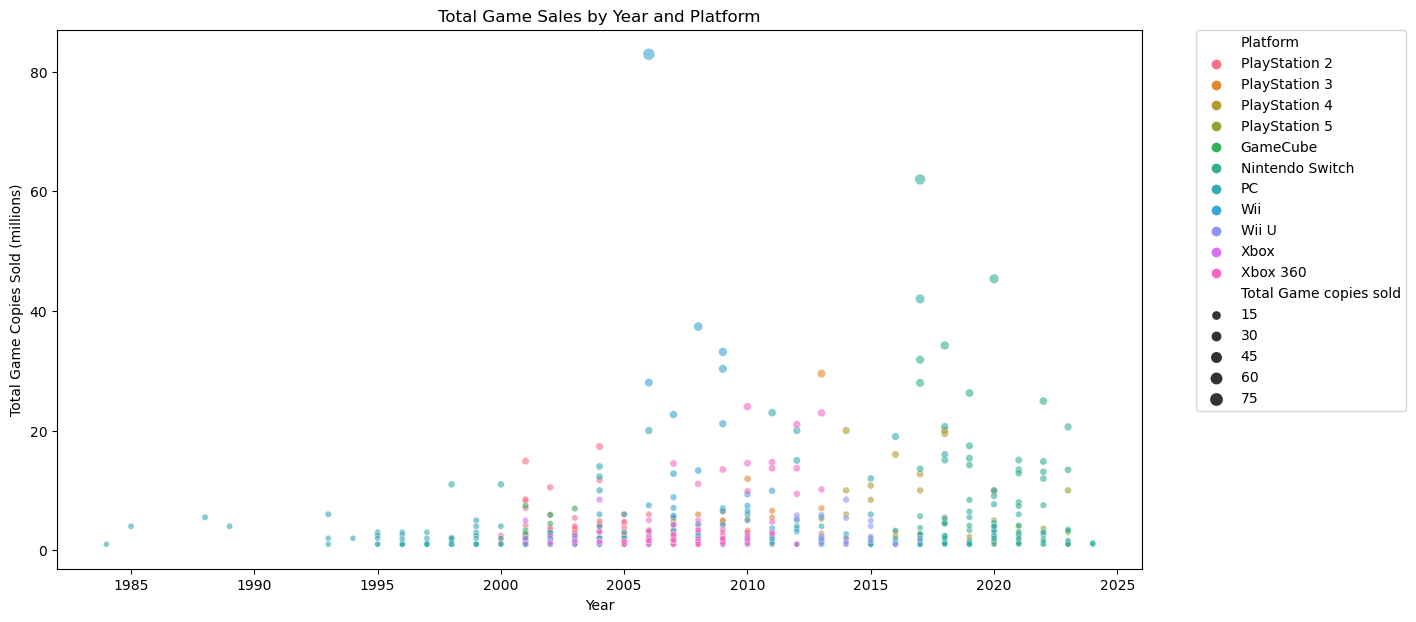

In [37]:
### Explore Relationships Between Variables
# Scatter plot of sales vs. year
plt.figure(figsize=(14, 7))
sns.scatterplot(data=all_data, x='Year', y='Total Game copies sold', hue='Platform')
plt.title('Total Game Sales vs. Year')
plt.xlabel('Year')
plt.ylabel('Total Game Copies Sold (millions)')
plt.show()

# Bubble chart of sales by year and platform
plt.figure(figsize=(14, 7))
sns.scatterplot(data=all_data, x='Year', y='Total Game copies sold', size='Total Game copies sold', hue='Platform', alpha=0.6)
plt.title('Total Game Sales by Year and Platform')
plt.xlabel('Year')
plt.ylabel('Total Game Copies Sold (millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

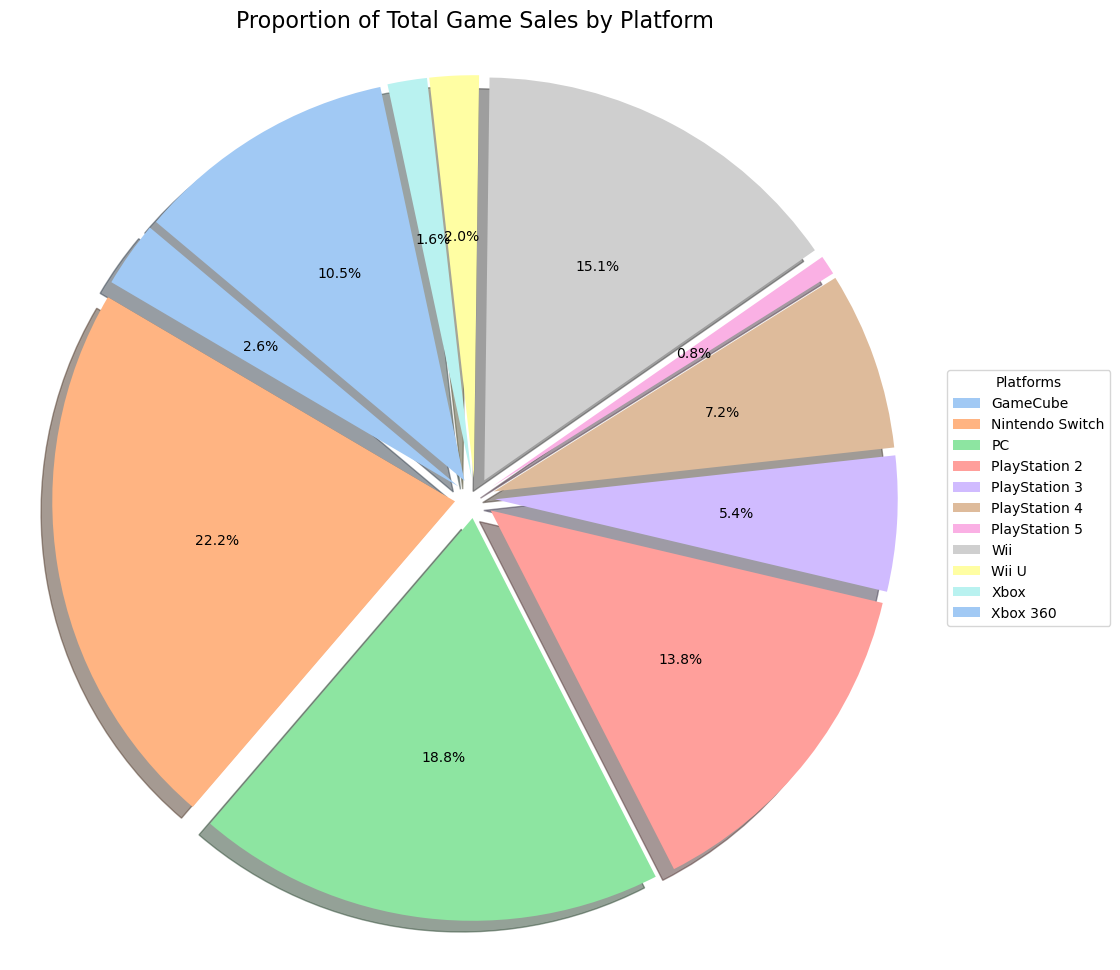

In [72]:

# Show Proportions or Contributions
# Pie chart of sales by platform
platform_sales = all_data.groupby('Platform')['Total Game copies sold'].sum()

# Define a color palette
colors = sns.color_palette('pastel')[0:len(platform_sales)]

# Plot pie chart
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(platform_sales, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True, explode=[0.05]*len(platform_sales))
plt.title('Proportion of Total Game Sales by Platform', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Customize the legend
plt.legend(wedges, platform_sales.index, title="Platforms", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.show()


Unique platforms in the data: ['PlayStation 2' 'PlayStation 3' 'PlayStation 4' 'PlayStation 5'
 'GameCube' 'Nintendo Switch' 'PC' 'Wii' 'Wii U' 'Xbox' 'Xbox 360']


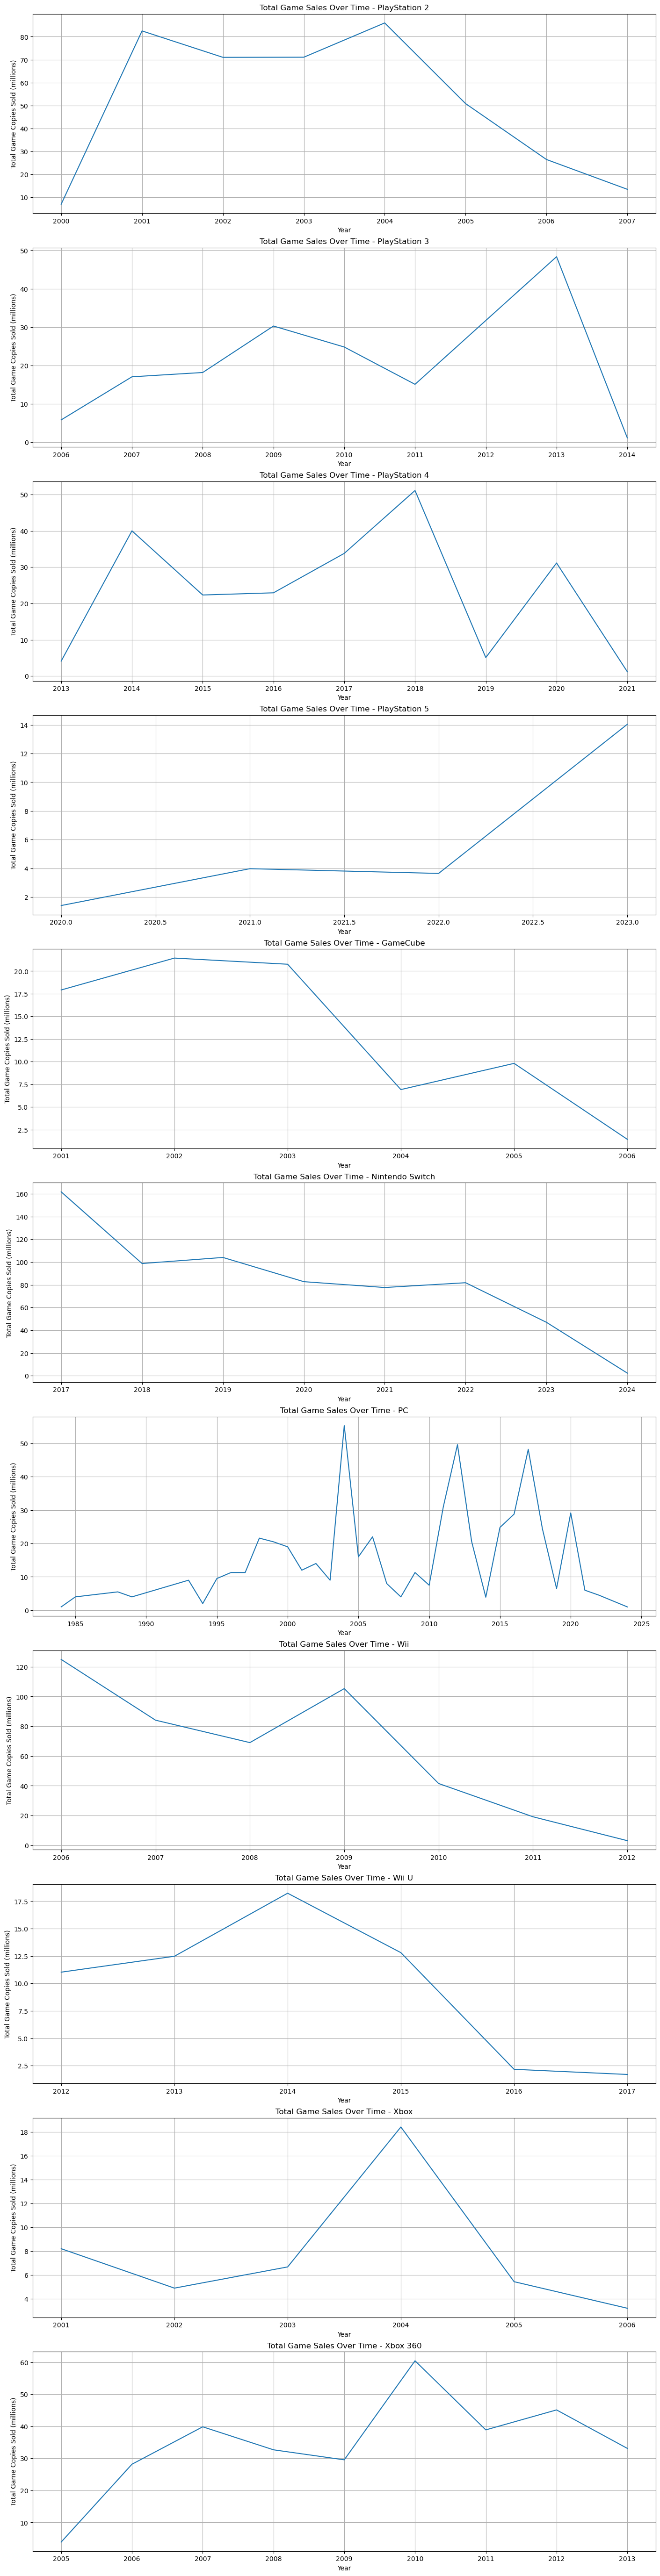

In [73]:

# Check for unique platform values in the DataFrame
unique_platforms = all_data['Platform'].unique()
print("Unique platforms in the data:", unique_platforms)

# Create multiple plots for yearly sales of each platform
num_platforms = len(unique_platforms)
fig, axes = plt.subplots(nrows=num_platforms, ncols=1, figsize=(14, num_platforms * 5), constrained_layout=True)

for ax, platform in zip(axes, unique_platforms):
    platform_data = all_data[all_data['Platform'] == platform]
    sales_per_year = platform_data.groupby('Year')['Total Game copies sold'].sum().reset_index()
    sns.lineplot(data=sales_per_year, x='Year', y='Total Game copies sold', ax=ax)
    ax.set_title(f'Total Game Sales Over Time - {platform}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Game Copies Sold (millions)')
    ax.grid(True)

plt.show()


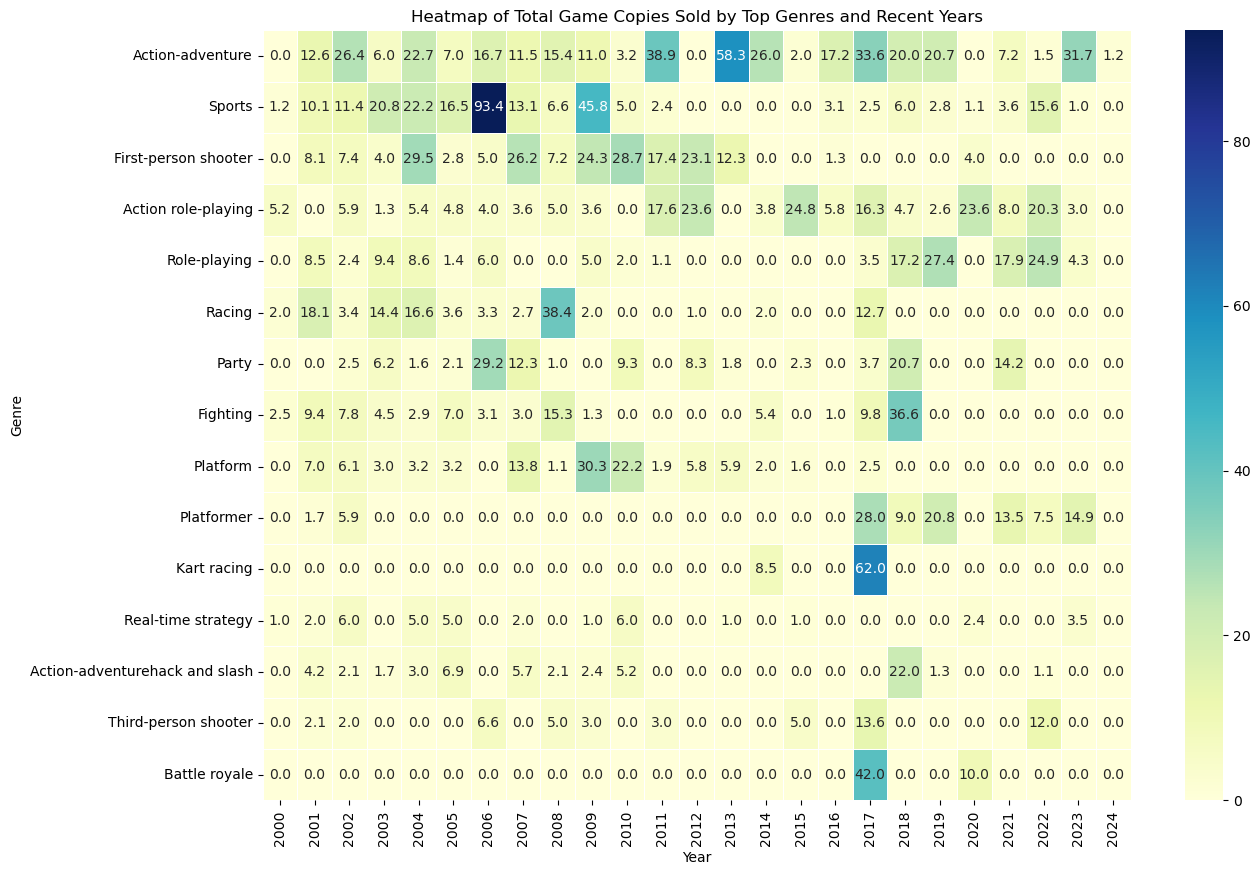

In [74]:

# Aggregate the data by genre and year
genre_year_data = all_data.groupby(['Genre', 'Year'])['Total Game copies sold'].sum().reset_index()

# Pivot the data to get a matrix with genres as rows and years as columns
genre_year_pivot = genre_year_data.pivot(index='Genre', columns='Year', values='Total Game copies sold')

# Fill NaN values with 0 (optional)
genre_year_pivot = genre_year_pivot.fillna(0)

# Focus on recent years ( from 2000 onwards) and top genres
recent_years = genre_year_pivot.columns[genre_year_pivot.columns >= 2000]
top_genres = genre_year_pivot.sum(axis=1).sort_values(ascending=False).head(15).index

# Create a heatmap for the top genres and recent years
plt.figure(figsize=(14, 10))
sns.heatmap(genre_year_pivot.loc[top_genres, recent_years], cmap='YlGnBu', linewidths=.5, annot=True, fmt='.1f')
plt.title('Heatmap of Total Game Copies Sold by Top Genres and Recent Years')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()

In [75]:

# Ensure 'Release date' column is present and convert it to datetime if necessary
if 'Release date' not in all_data.columns:
    raise ValueError("The 'Release date' column is missing from the dataset.")

all_data['Release date'] = pd.to_datetime(all_data['Release date'], errors='coerce')

# Extract the year from 'Release date'
all_data['Year'] = all_data['Release date'].dt.year

# Group by Year and Platform to count the number of releases
releases_per_year = all_data.groupby(['Year', 'Platform']).size().reset_index(name='Counts')

# Find the most frequent console for each year
most_frequent_console_per_year = releases_per_year.loc[releases_per_year.groupby('Year')['Counts'].idxmax()]

# Display the result
print("Most Frequent Console Releases per Year:")
print(most_frequent_console_per_year)

# Optionally, save the result to a CSV file
most_frequent_console_per_year.to_csv('most_frequent_console_per_year.csv', index=False)

Most Frequent Console Releases per Year:
     Year         Platform  Counts
0    1984               PC       1
1    1985               PC       1
2    1988               PC       1
3    1989               PC       1
4    1993               PC       3
5    1994               PC       1
6    1995               PC       5
7    1996               PC       7
8    1997               PC       8
9    1998               PC       8
10   1999               PC       9
11   2000               PC       5
15   2001    PlayStation 2      26
19   2002    PlayStation 2      30
23   2003    PlayStation 2      34
27   2004    PlayStation 2      31
31   2005    PlayStation 2      21
40   2006         Xbox 360      14
44   2007              Wii      16
48   2008              Wii      13
52   2009              Wii      11
56   2010              Wii      11
58   2011               PC       5
62   2012               PC       7
66   2013               PC      10
73   2014    PlayStation 4       5
75   2015     

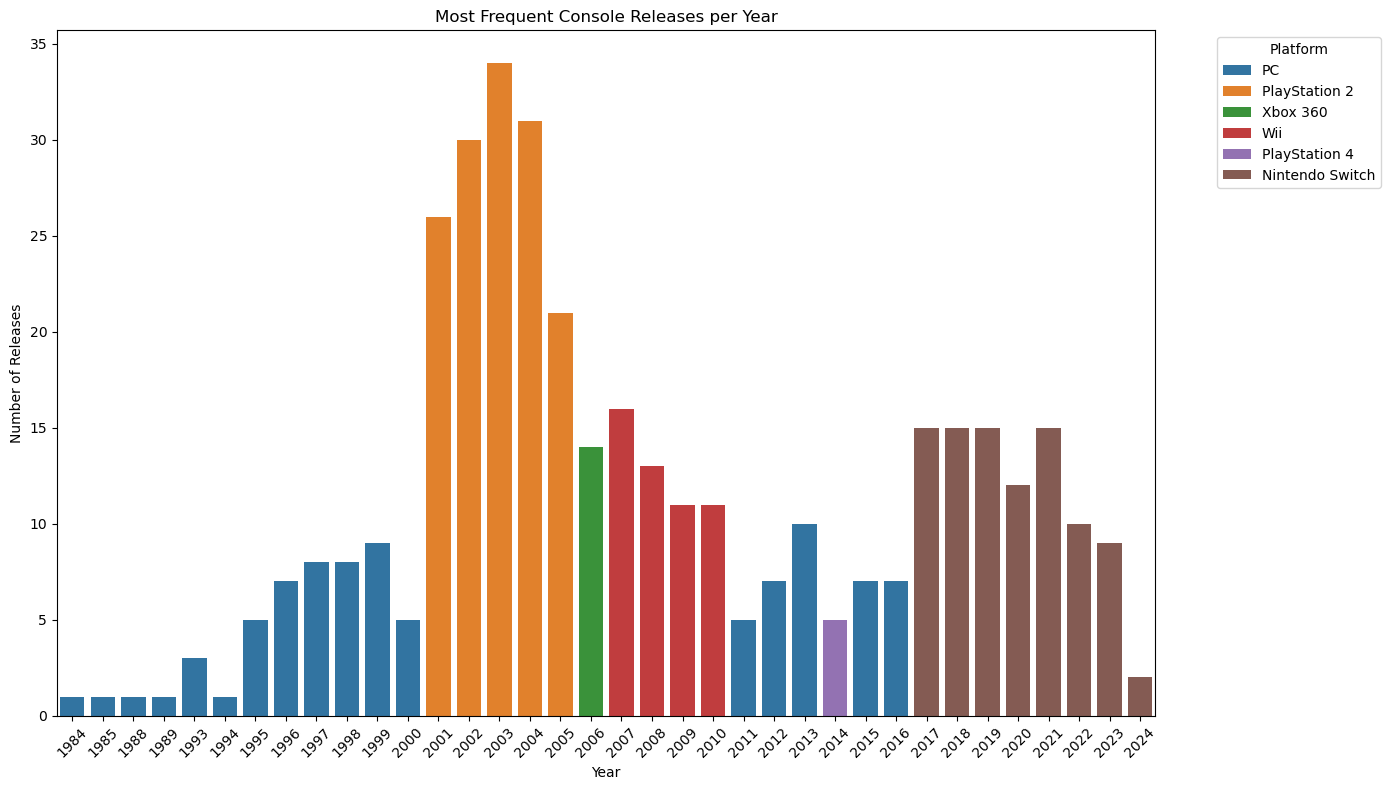

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=most_frequent_console_per_year, x='Year', y='Counts', hue='Platform', dodge=False)

# Title and labels
plt.title('Most Frequent Console Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

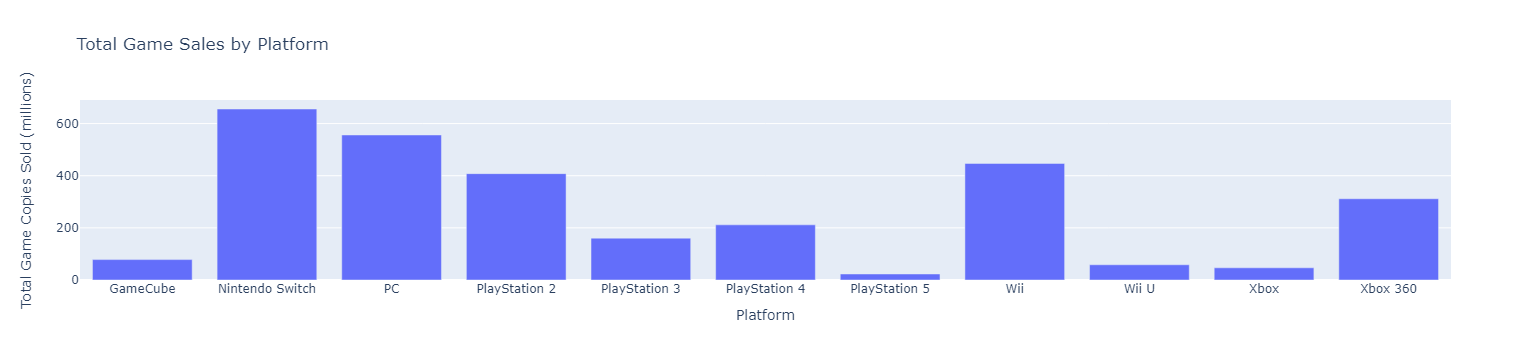

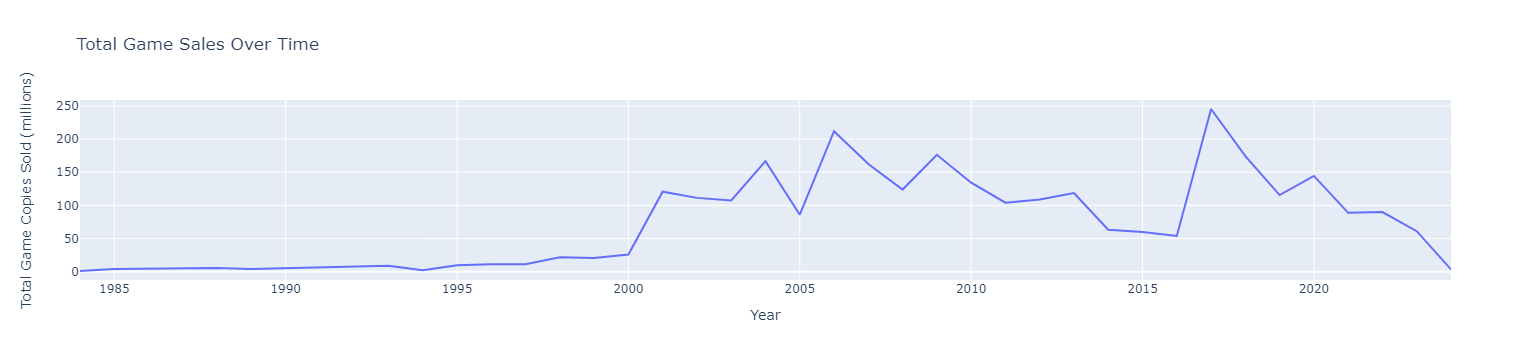

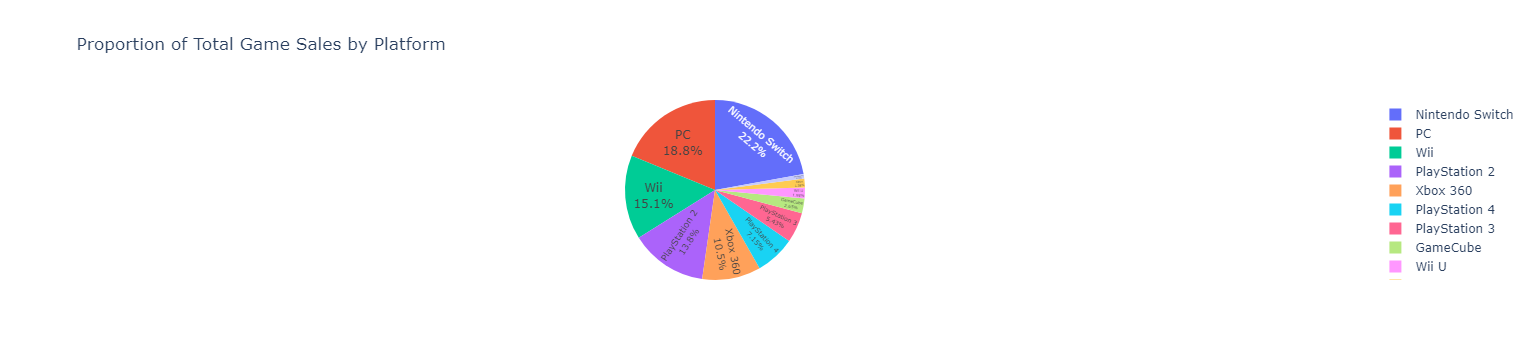

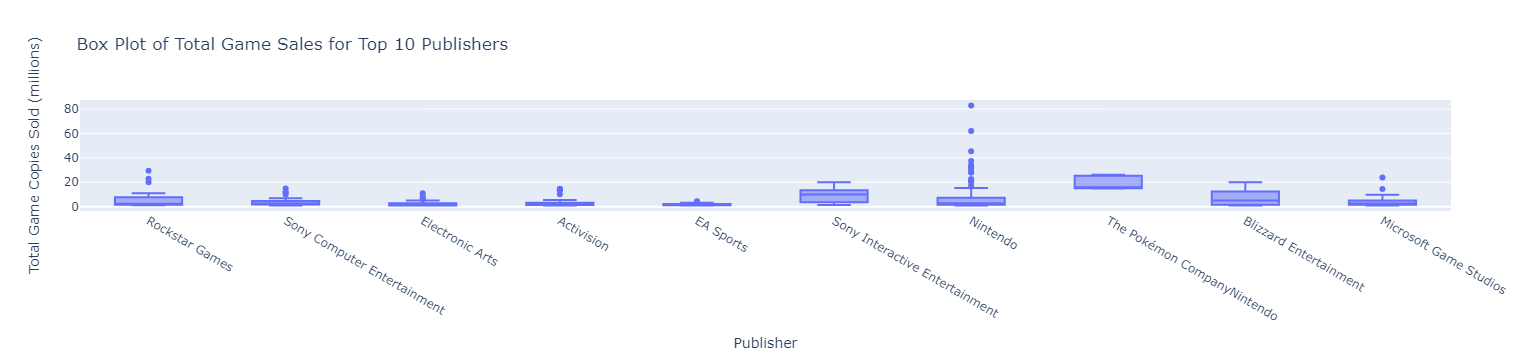

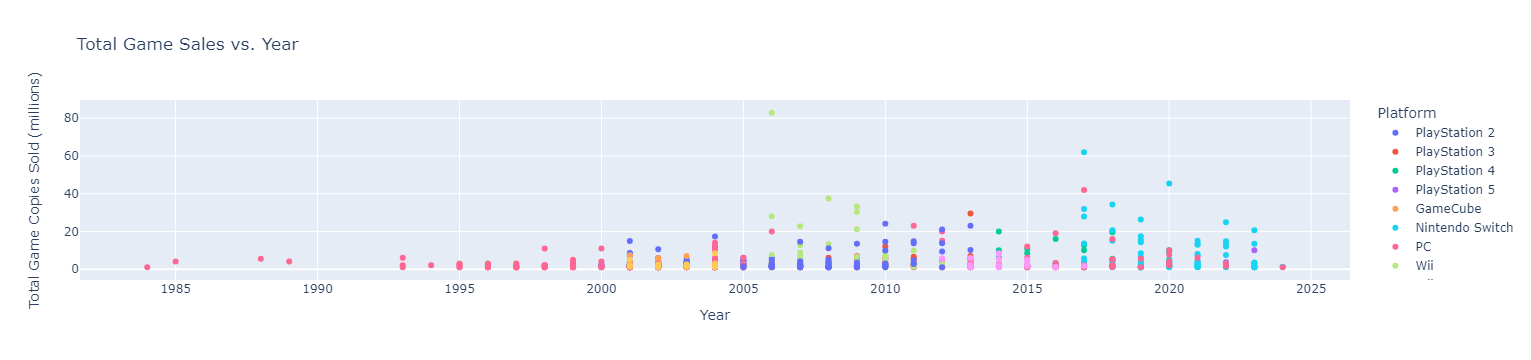

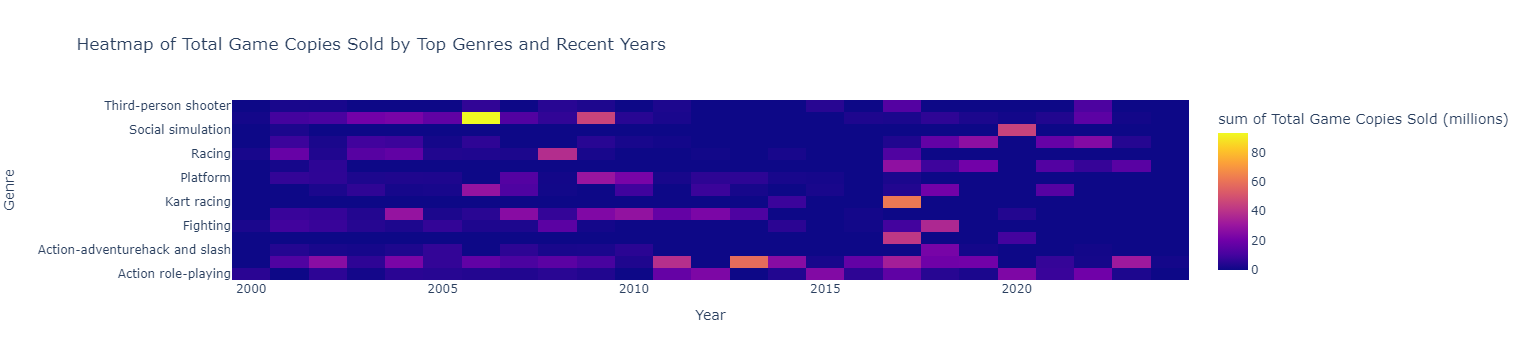

In [66]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert 'Release date' to datetime
all_data['Release date'] = pd.to_datetime(all_data['Release date'], errors='coerce')

# Add new features
all_data['Year'] = all_data['Release date'].dt.year
all_data['Release month'] = all_data['Release date'].dt.month
all_data['Log_Total Game copies sold'] = np.log1p(all_data['Total Game copies sold'])

# Interactive Bar Plot of Total Game Sales by Platform
platform_sales = all_data.groupby('Platform')['Total Game copies sold'].sum().reset_index()
fig_bar = px.bar(platform_sales, x='Platform', y='Total Game copies sold',
                 title='Total Game Sales by Platform', labels={'Total Game copies sold': 'Total Game Copies Sold (millions)'})
fig_bar.show()

# Interactive Line Plot of Sales Over Time
sales_per_year = all_data.groupby('Year')['Total Game copies sold'].sum().reset_index()
fig_line = px.line(sales_per_year, x='Year', y='Total Game copies sold', title='Total Game Sales Over Time',
                   labels={'Total Game copies sold': 'Total Game Copies Sold (millions)'})
fig_line.show()

# Interactive Pie Chart of Proportion of Total Game Sales by Platform
fig_pie = px.pie(platform_sales, values='Total Game copies sold', names='Platform',
                 title='Proportion of Total Game Sales by Platform')
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()

# Interactive Box Plot of Total Game Sales for Top 10 Publishers
top_10_publishers = all_data.groupby('Publisher')['Total Game copies sold'].sum().nlargest(10).reset_index()
top_publishers_data = all_data[all_data['Publisher'].isin(top_10_publishers['Publisher'])]
fig_box = px.box(top_publishers_data, x='Publisher', y='Total Game copies sold',
                 title='Box Plot of Total Game Sales for Top 10 Publishers', labels={'Total Game copies sold': 'Total Game Copies Sold (millions)'})
fig_box.show()

# Interactive Scatter Plot of Total Game Sales vs. Year
fig_scatter = px.scatter(all_data, x='Year', y='Total Game copies sold', color='Platform',
                         title='Total Game Sales vs. Year', labels={'Total Game copies sold': 'Total Game Copies Sold (millions)'})
fig_scatter.show()

# Interactive Heatmap of Total Game Copies Sold by Top Genres and Recent Years
genre_year_data = all_data.groupby(['Genre', 'Year'])['Total Game copies sold'].sum().reset_index()
recent_years = genre_year_data[genre_year_data['Year'] >= 2000]
top_genres = recent_years.groupby('Genre')['Total Game copies sold'].sum().nlargest(15).index
heatmap_data = recent_years[recent_years['Genre'].isin(top_genres)]
fig_heatmap = px.density_heatmap(heatmap_data, x='Year', y='Genre', z='Total Game copies sold',
                                 title='Heatmap of Total Game Copies Sold by Top Genres and Recent Years',
                                 labels={'Total Game copies sold': 'Total Game Copies Sold (millions)'}, nbinsx=30)
fig_heatmap.show()


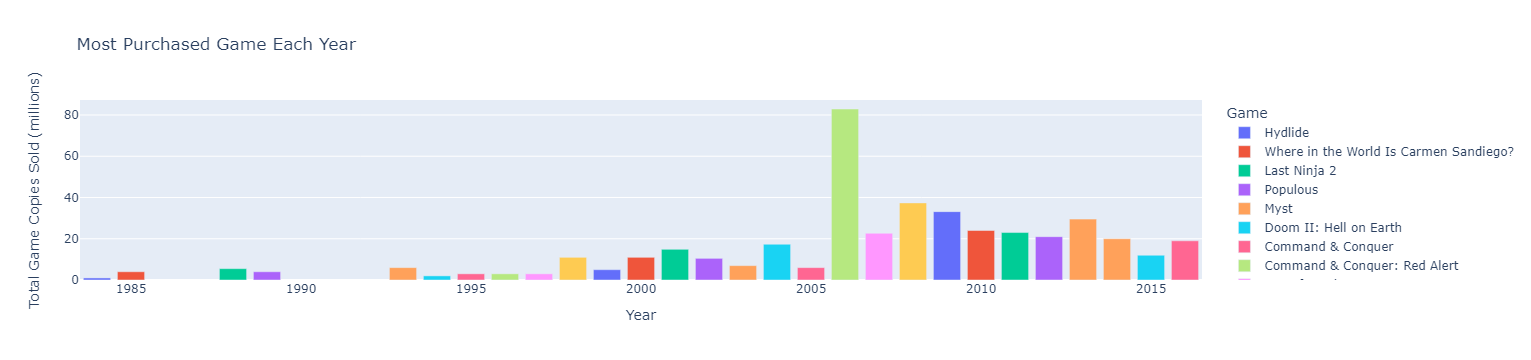

In [76]:

# Convert 'Release date' to datetime
all_data['Release date'] = pd.to_datetime(all_data['Release date'], errors='coerce')

# Extract the year from 'Release date'
all_data['Year'] = all_data['Release date'].dt.year

# Find the most purchased game for each year
most_purchased_game_per_year = all_data.loc[all_data.groupby('Year')['Total Game copies sold'].idxmax()]

# Create an interactive bar plot
fig = px.bar(most_purchased_game_per_year, x='Year', y='Total Game copies sold', 
             color='Game', title='Most Purchased Game Each Year',
             labels={'Total Game copies sold': 'Total Game Copies Sold (millions)', 'Year': 'Year'},
             hover_data={'Game': True, 'Publisher': True, 'Total Game copies sold': True})

# Display the plot
fig.show()


In [41]:

# Verify the column names to ensure 'Platform' dummies exist
print("Column names in all_data:")
print(all_data.columns)

# Create new features

# Extracting more granular time features from 'Release date'
all_data['Release month'] = all_data['Release date'].dt.month
all_data['Release day'] = all_data['Release date'].dt.day
all_data['Release dayofweek'] = all_data['Release date'].dt.dayofweek

# Creating a feature for decade
all_data['Release decade'] = (all_data['Year'] // 10) * 10

# Log transformation for 'Total Game copies sold' to normalize the distribution
all_data['Log_Total Game copies sold'] = np.log1p(all_data['Total Game copies sold'])

# Interaction features: Interaction between 'Release month' and 'Platform' (considering all platforms)
platform_columns = [col for col in all_data.columns if col.startswith('Platform_')]
for platform_col in platform_columns:
    all_data[f'Month_{platform_col}'] = all_data['Release month'] * all_data[platform_col]

# Interaction features: Interaction between 'Release decade' and 'Platform'
for platform_col in platform_columns:
    all_data[f'Decade_{platform_col}'] = all_data['Release decade'] * all_data[platform_col]

# Verify the newly created features
print("First few rows with new features:")
print(all_data.head())

# Display the columns to verify the new features
print("Columns after feature engineering:")
print(all_data.columns)

Column names in all_data:
Index(['Game', 'Total Game copies sold', 'Release date', 'Genre', 'Developer',
       'Publisher', 'Platform', 'Title', 'As of', 'Series', 'Year'],
      dtype='object')
First few rows with new features:
                           Game  Total Game copies sold Release date  \
0         Tekken Tag Tournament                   2.467   2000-03-30   
1               Madden NFL 2001                   1.236   2000-10-26   
2  Midnight Club: Street Racing                   1.976   2000-10-26   
3                    Dark Cloud                   1.200   2000-12-14   
4            Onimusha: Warlords                   2.020   2001-01-25   

                            Genre      Developer  \
0                        Fighting          Namco   
1                          Sports     EA Tiburon   
2                          Racing  Angel Studios   
3             Action role-playing        Level-5   
4  Action-adventurehack and slash         Capcom   

                        

In [77]:

# Feature Engineering
all_data['Release month'] = all_data['Release date'].dt.month
all_data['Release day'] = all_data['Release date'].dt.day
all_data['Release dayofweek'] = all_data['Release date'].dt.dayofweek
all_data['Release decade'] = (all_data['Year'] // 10) * 10
all_data['Log_Total Game copies sold'] = np.log1p(all_data['Total Game copies sold'])

# Interaction features: Interaction between 'Release month' and 'Platform' (considering all platforms)
platform_columns = [col for col in all_data.columns if col.startswith('Platform_')]
for platform_col in platform_columns:
    all_data[f'Month_{platform_col}'] = all_data['Release month'] * all_data[platform_col]

for platform_col in platform_columns:
    all_data[f'Decade_{platform_col}'] = all_data['Release decade'] * all_data[platform_col]

# Ensure all features are numeric
numeric_features = all_data.select_dtypes(include=[np.number])

# Separate features and target variable
features = numeric_features.drop(columns=['Total Game copies sold', 'Log_Total Game copies sold'])
target = all_data['Log_Total Game copies sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the predictive model (Linear Regression and Random Forest)
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the models
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Random Forest MSE: {rf_mse}")

# Choose the best model based on MSE
best_model = rf_model if rf_mse < lr_mse else lr_model

# Save the best model to a file
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)
print(f"Model saved as {model_filename}")

# Load the model (for deployment)
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Function to make predictions with new input data
def make_prediction(input_data):
    # Assuming input_data is a DataFrame similar to features
    prediction = loaded_model.predict(input_data)
    return np.expm1(prediction)  # Inverse log transformation

# Example usage
new_data = X_test.iloc[:5]  # Example new data
predictions = make_prediction(new_data)
print("Predictions for new data:")
print(predictions)


Linear Regression MSE: 0.41893758080421967
Random Forest MSE: 0.472919233383877
Model saved as best_model.pkl
Predictions for new data:
[4.16504016 3.33580667 2.77342989 2.01881186 4.20946424]


In [43]:

# Feature Engineering
all_data['Release month'] = all_data['Release date'].dt.month
all_data['Release day'] = all_data['Release date'].dt.day
all_data['Release dayofweek'] = all_data['Release date'].dt.dayofweek
all_data['Release decade'] = (all_data['Year'] // 10) * 10
all_data['Log_Total Game copies sold'] = np.log1p(all_data['Total Game copies sold'])

# Interaction features: Interaction between 'Release month' and 'Platform' (considering all platforms)
platform_columns = [col for col in all_data.columns if col.startswith('Platform_')]
for platform_col in platform_columns:
    all_data[f'Month_{platform_col}'] = all_data['Release month'] * all_data[platform_col]

for platform_col in platform_columns:
    all_data[f'Decade_{platform_col}'] = all_data['Release decade'] * all_data[platform_col]

# Ensure all features are numeric
numeric_features = all_data.select_dtypes(include=[np.number])

# Display the new features
print("New feature columns added:")
print(numeric_features.columns)

New feature columns added:
Index(['Total Game copies sold', 'Year', 'Release month', 'Release day',
       'Release dayofweek', 'Release decade', 'Log_Total Game copies sold'],
      dtype='object')


In [78]:

# Separate features and target variable
features = numeric_features.drop(columns=['Total Game copies sold', 'Log_Total Game copies sold'])
target = all_data['Log_Total Game copies sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the predictive model (Linear Regression and Random Forest)
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the models
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Random Forest MSE: {rf_mse}")

# Choose the best model based on MSE
best_model = rf_model if rf_mse < lr_mse else lr_model

# Save the best model to a file
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)
print(f"Model saved as {model_filename}")

# Load the model (for deployment)
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Function to make predictions with new input data
def make_prediction(input_data):
    # Assuming input_data is a DataFrame similar to features
    prediction = loaded_model.predict(input_data)
    return np.expm1(prediction)  # Inverse log transformation

# Example usage
new_data = X_test.iloc[:5]  # Example new data
predictions = make_prediction(new_data)
print("Predictions for new data:")
print(predictions)

Linear Regression MSE: 0.41893758080421967
Random Forest MSE: 0.472919233383877
Model saved as best_model.pkl
Predictions for new data:
[4.16504016 3.33580667 2.77342989 2.01881186 4.20946424]


In [45]:

# Log transform 'Total Game copies sold' for better model performance
all_data['Log_Total Game copies sold'] = np.log1p(all_data['Total Game copies sold'])

# Extract 'Release month' from 'Release date'
all_data['Release month'] = all_data['Release date'].dt.month

# Creating dummy variables for 'Platform'
# Since platforms are already in individual columns, no need to create dummy variables

# Interaction features: Interaction between 'Release month' and 'Platform' (considering all platforms)
platform_columns = [col for col in all_data.columns if col.startswith('Platform_')]
for platform in platform_columns:
    all_data[f'Interaction_{platform}_month'] = all_data['Release month'] * all_data[platform]

# Display the first few rows of the new DataFrame with engineered features
print(all_data.head())

### Model Training and Deployment
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Selecting features and target variable for the model
features = ['Year', 'Release month'] + platform_columns + [f'Interaction_{platform}_month' for platform in platform_columns]
target = 'Log_Total Game copies sold'

X = all_data[features]
y = all_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the predictive models (Linear Regression and Random Forest)
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Print the MSE for both models
print(f"Linear Regression MSE: {lr_mse}")
print(f"Random Forest MSE: {rf_mse}")

# Choose the best model based on MSE
best_model = lr_model if lr_mse < rf_mse else rf_model

# Save the best model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
print("Model saved as best_model.pkl")

# Example of using the model for predictions on new data
new_data = X_test.iloc[:5]  # Taking the first 5 samples from the test set as new data
predictions = best_model.predict(new_data)
print("Predictions for new data:")
print(np.expm1(predictions))  # Converting predictions back from log scale


                           Game  Total Game copies sold Release date  \
0         Tekken Tag Tournament                   2.467   2000-03-30   
1               Madden NFL 2001                   1.236   2000-10-26   
2  Midnight Club: Street Racing                   1.976   2000-10-26   
3                    Dark Cloud                   1.200   2000-12-14   
4            Onimusha: Warlords                   2.020   2001-01-25   

                            Genre      Developer  \
0                        Fighting          Namco   
1                          Sports     EA Tiburon   
2                          Racing  Angel Studios   
3             Action role-playing        Level-5   
4  Action-adventurehack and slash         Capcom   

                                    Publisher       Platform Title As of  \
0    WW: NamcoEU: Sony Computer Entertainment  PlayStation 2   NaN   NaN   
1  NA/EU: EA SportsJP: Electronic Arts Square  PlayStation 2   NaN   NaN   
2                         